# Computergestützte Mathematik zur Analysis

11.02.2021

Prof. Dr. Rüdiger Braun

In [1]:
from sympy import *
init_printing()
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = S('x')
y = Function('y')

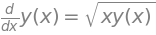

In [3]:
dgl = Eq(y(x).diff(x), sqrt(x*y(x)))
dgl

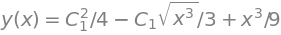

In [4]:
lsg = dsolve(dgl)
lsg

In [5]:
phi = lsg.rhs

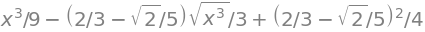

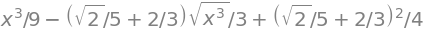

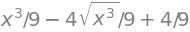

In [6]:
w_liste = [Rational(1,50), Rational(1,9)]
fn = []
for w in w_liste:
    ab_glg = Eq(phi.subs(x,1), w)
    ab_lsg = solve({ab_glg})
    for l in ab_lsg:
        f_ab = phi.subs(l)
        display(f_ab)
        fn.append(lambdify(x, f_ab))

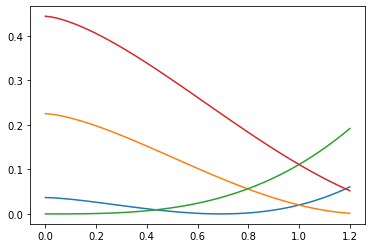

In [7]:
xn = np.linspace(0, 1.2)
fig = plt.figure()
ax = fig.add_subplot(111)
for ff in fn:
    ax.plot(xn, ff(xn))

In [8]:
nx = 15
ny = 19 
xq = np.linspace(0, 1.2, nx)
yq = np.linspace(0, .5, ny)
X, Y = np.meshgrid(xq, yq)
vf = np.zeros_like(X)
for j in range(nx):
    for k in range(ny):
        vf[k,j] = dgl.rhs.subs({x: xq[j], y(x): yq[k]})
U = np.ones_like(X)
V = vf
ax.quiver(X, Y, U, V, angles='xy');

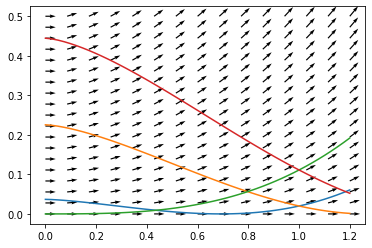

In [9]:
fig

Alle fallenden Äste sind Unsinn

# Bernoullische Differentialgleichungen 

Eine Differentialgleichung der Form
  \begin{equation*}
    y' + g(x) y + h(x) y^\alpha = 0. \qquad (1)
  \end{equation*}
heißt *Bernoullische Differentialgleichung*.

Durch die Substitution $y=w^{1/(1-\alpha)}$ wird sie in eine lineare Differentialgleichung transformiert.  Das geht aber nur dort, wo $w>0$.

In [12]:
alpha = Rational(1,2)
1/(1-alpha)

In [13]:
w = Function('w', positive=True)

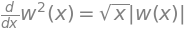

In [14]:
ldgl = dgl.subs(y(x), w(x)**2)
ldgl

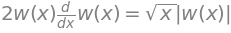

In [16]:
tmp = ldgl.doit()
tmp

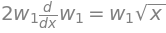

In [17]:
w1 = Symbol('w1', positive=True)
tmp = tmp.subs(w(x), w1)
tmp

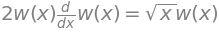

In [18]:
tmp = tmp.subs(w1, w(x))
tmp

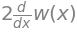

In [19]:
l = tmp.lhs/w(x)
l

In [20]:
r = tmp.rhs/w(x)
r

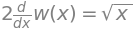

In [21]:
dgl2 = Eq(l, r)
dgl2

In [22]:
lsg = dsolve(dgl2)
lsg

Die Anfangsbedingung $y(1)=\frac19$ übersetzt sich zu $w(1)=\frac13$.

In [23]:
psi = lsg.rhs
ab = Eq(psi.subs(x,1), Rational(1,3))
ab

Also $C_1=0$ und

In [24]:
C1 = S('C1')
y1 = psi.subs(C1, 0)**2
y1

Die falsche Lösung entsteht, wenn man erst quadriert

In [25]:
phi_f = psi**2
phi_f

In [26]:
ab_f = Eq(phi_f.subs(x,1), Rational(1,9))
ab_f

In [27]:
lsg_f = solve(ab_f)
lsg_f

In [28]:
psi.subs(C1, lsg_f[0]).subs(x,1)

Dort ist $w<0$.  Deswegen ist in dem Plot die rote Kurve falsch und die grüne auf ganzer Länge richtig.

In [29]:
ab = Eq(psi.subs(x,1), 1/sqrt(50))
ab

In [30]:
lsg_ab = solve(ab)
lsg_ab

In [31]:
psi2 = psi.subs(C1, lsg_ab[0])
psi2

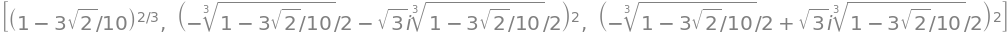

In [33]:
lsg2 = solve(Eq(psi2, 0))
lsg2

In [34]:
lsg2[0].n()


Links davon gibt es keine Lösung dieser AWA.

In [35]:
y2 = psi2**2
y2

In [36]:
f1 = lambdify(x, y1)
f2 = lambdify(x, y2)

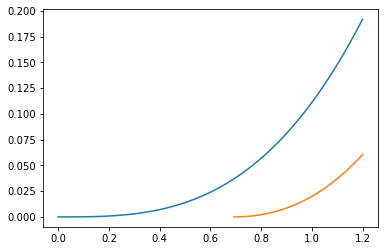

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
xn = np.linspace(0, 1.2)
ax.plot(xn, f1(xn))
xn = np.linspace(float(lsg2[0].n()), 1.2)   # TypeError
ax.plot(xn, f2(xn));

# Beliebig genaue Rechnung mit Fließkommazahlen

In [46]:
pi.n(n=100)

In [40]:
lsg2[0].n(n=100)

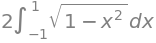

In [41]:
I1 = 2*Integral(sqrt(1-x**2), (x,-1,1))
I1

In [47]:
I1.n(n=100)

# Parametrische 2D Plots 

In [48]:
t = np.linspace(0, 2*np.pi, 550)

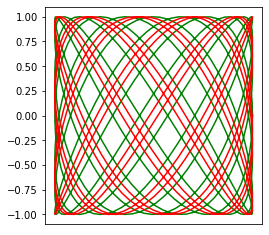

In [49]:
plt.plot(np.cos(7*t), np.sin(11*t), 'g')
plt.plot(np.cos(.1+7*t), np.sin(11*t), 'r')
plt.axis('image')
plt.xticks([]);  # <-  leere Liste: keine Ticks

# Implizite Plots in 2D

In [50]:
def f(x, y):
    return (x**2+y**2)**2 + 3*x**2*y - y**3

In [51]:
x = np.linspace(-1.1, 1.1, 701)
y = np.linspace(-1.1, 1.1, 701)
X, Y = np.meshgrid(x, y)
Z = f(X, Y) 

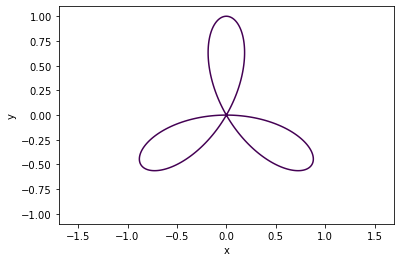

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.contour(X, Y, Z, levels=[0])
ax.axis('equal');

# Implizite Plots in 3D 

In [57]:
#conda install scikit-image

In [59]:
from skimage import measure 

In [60]:
xn = np.linspace(-1.1, 1.1)
yn = np.linspace(-1.1, 1.1)
zn = np.linspace(-1.1, 1.1)
X, Y , Z = np.meshgrid(xn, yn, zn)
h = X**2 + Y**2 + Z**2

In [61]:
verts, faces, normals, values = measure.marching_cubes_lewiner(h, 1)

<ipython-input-61-1c9dfc3f3a5f>:1: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, normals, values = measure.marching_cubes_lewiner(h, 1)


In [62]:
faces[0]

array([2, 1, 0], dtype=int32)

In [63]:
verts[0]

array([ 2.9699008, 19.       , 23.       ], dtype=float32)

In [64]:
faces.shape

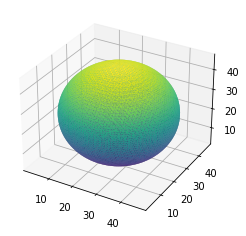

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:, 2], cmap=plt.cm.viridis);

Die Ecken der Dreiecke sind in dem Raum der Indices interpoliert. Das heißt die Achsenbeschriftung ist falsch.

Beim nächsten Beispiel beheben wir dieses Problem durch Interpolation.

In [66]:
np.interp(2.3, [1,2,3], [1,2,4])

In [67]:
xn = np.linspace(-1.8, 1.2)
yn = np.linspace(-1.3, 1.3)
zn = np.linspace(-1.3, 1.3)
X, Y, Z = np.meshgrid(xn, yn, zn)
h = Y**2 - (X-1)*(X+1)**2 - Z**2

In [68]:
verts, faces, n, v = measure.marching_cubes_lewiner(h, 0)  
len(faces)

<ipython-input-68-1855657dfa89>:1: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, n, v = measure.marching_cubes_lewiner(h, 0)


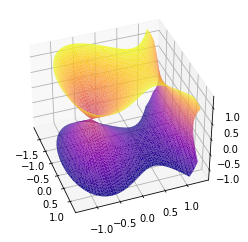

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xi = np.interp(verts[:,0], np.arange(len(xn)), xn)
yi = np.interp(verts[:,1], np.arange(len(yn)), yn)
zi = np.interp(verts[:,2], np.arange(len(zn)), zn)
ax.plot_trisurf(xi, yi, faces, zi, cmap=plt.cm.plasma)
ax.view_init(38, -20); 

In [70]:
verts[0:10,0]

array([1.        , 0.5706718 , 1.        , 0.5706718 , 1.        ,
       1.        , 1.        , 0.25192258, 0.25192258, 1.        ],
      dtype=float32)

In [71]:
xi[0:10]

array([-1.73877551, -1.76506091, -1.73877551, -1.76506091, -1.73877551,
       -1.73877551, -1.73877551, -1.78457617, -1.78457617, -1.73877551])

In [72]:
xn[0:2]

array([-1.8       , -1.73877551])

# Klausurbewertung

Zur Bewertung Ihrer Klausur werden die Ausgaben gelöscht und mit 

Cell->Run All

alle Befehle von oben nach unten ausgeführt.  Achten Sie darauf, dass Ihre Zellen in dieser Reihenfolge Sinn machen.

Die Richtigkeit der Ergebnisse ist wichtig. 